Time Series Forecasting with XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

In [2]:
noaaData = pd.read_csv('data/aucklandNoaa.csv')
noaaData.tail()


,STATION,NAME,date,precipitation,SNWD,tavg,tmax,tmin
10600,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-09-30,0.05,NaN,54.0,NaN,47.0
10601,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-10-01,0.00,NaN,58.0,NaN,51.0
10602,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-10-02,0.17,NaN,58.0,65.0,53.0
10603,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-10-03,0.00,NaN,52.0,61.0,41.0
10604,NZM00093110,"AUCKLAND AERO AWS, NZ",2023-10-04,0.00,NaN,56.0,60.0,41.0


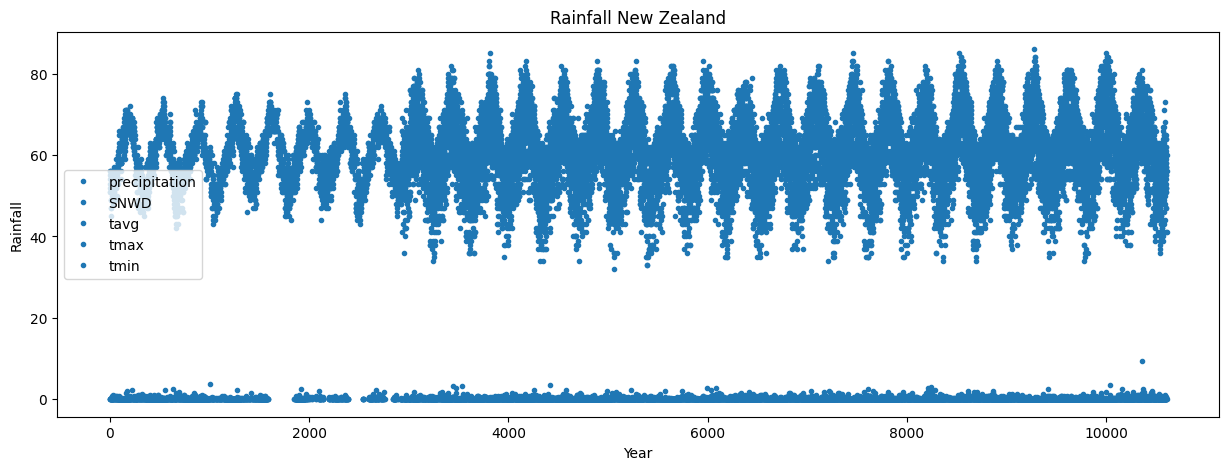

In [3]:
noaaData.plot(style='.', figsize=(15,5), color=color_pal[0], title='Rainfall New Zealand', xlabel="Year", ylabel='Rainfall')
plt.show()

In [4]:
noaaData.index

RangeIndex(start=0, stop=10605, step=1)

In [5]:
noaaData.columns

Index(['STATION', 'NAME', 'date', 'precipitation', 'SNWD', 'tavg', 'tmax',
       'tmin'],
      dtype='object')

<Axes: title={'center': 'Rainfall Auckland 1960 to 2023 (NOAA)'}, xlabel='Year', ylabel='Rainfall'>

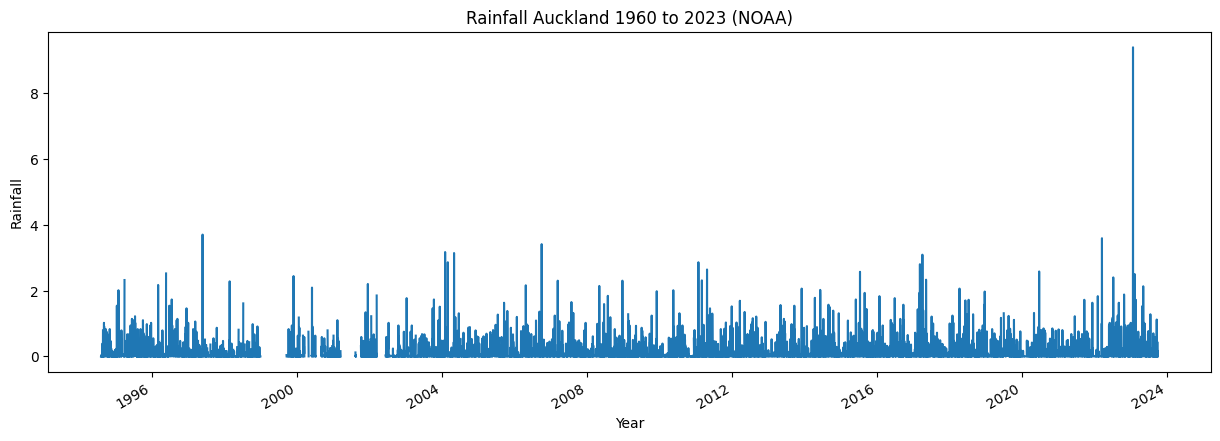

In [6]:
noaaData = noaaData.set_index('date')
noaaData.index = pd.to_datetime(noaaData.index)
noaaData['precipitation'].plot(figsize=(15,5),  title='Rainfall Auckland 1960 to 2023 (NOAA)', xlabel="Year", ylabel='Rainfall')

<Axes: title={'center': 'Rainfall Auckland 1994 to 2023 (NOAA)'}, xlabel='Year', ylabel='Rainfall'>

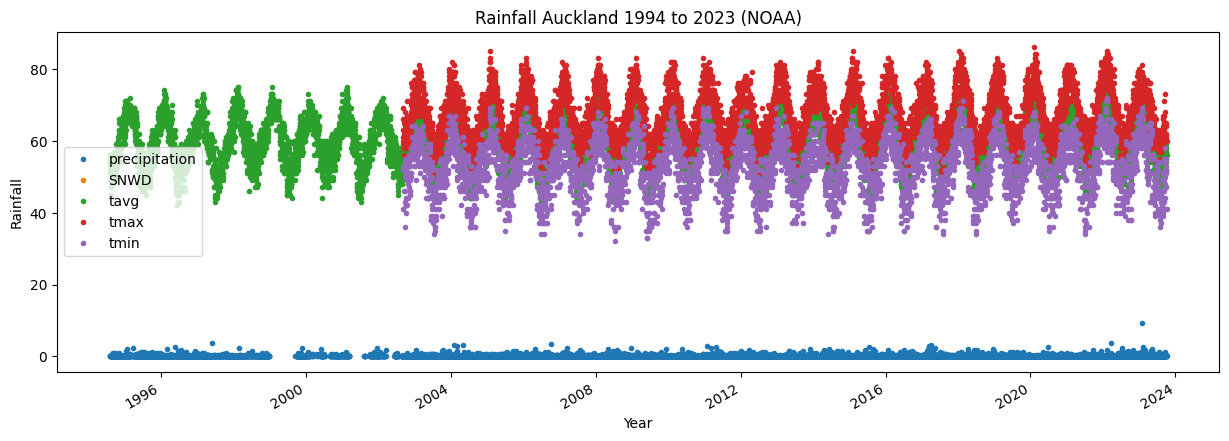

In [7]:
# noaaData = noaaData.set_index('DATE')
# noaaData.index = pd.to_datetime(noaaData.index)
noaaData.plot(style='.', figsize=(15,5), title='Rainfall Auckland 1994 to 2023 (NOAA)', xlabel="Year", ylabel='Rainfall')

Tras/ Test/ Split

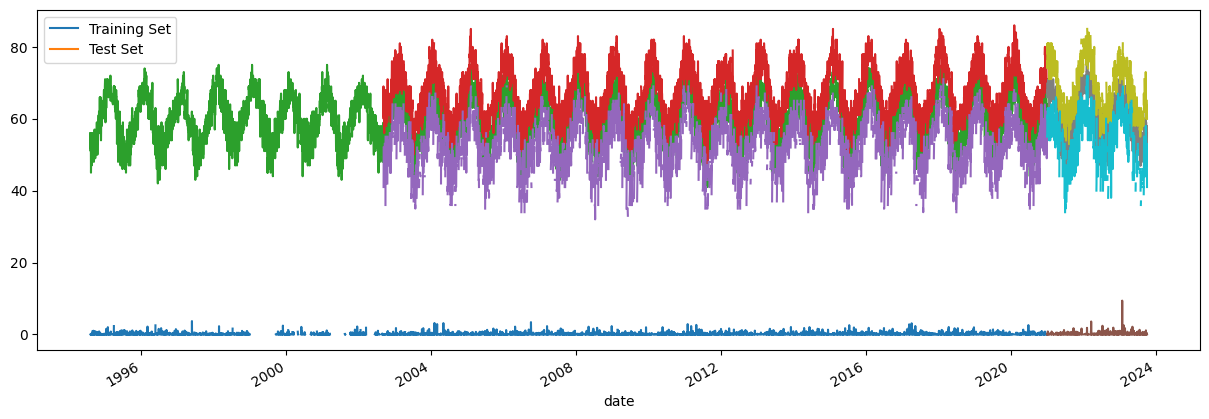

In [8]:
train = noaaData.loc[noaaData.index < '2020-12-31']
test = noaaData.loc[noaaData.index >= '2020-12-31']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Training Set")
test.plot(ax=ax, label="Testing Set")
ax.legend(['Training Set', 'Test Set'])
plt.show()

look for 1 week of data

<Axes: title={'center': 'Week of Data'}, xlabel='date'>

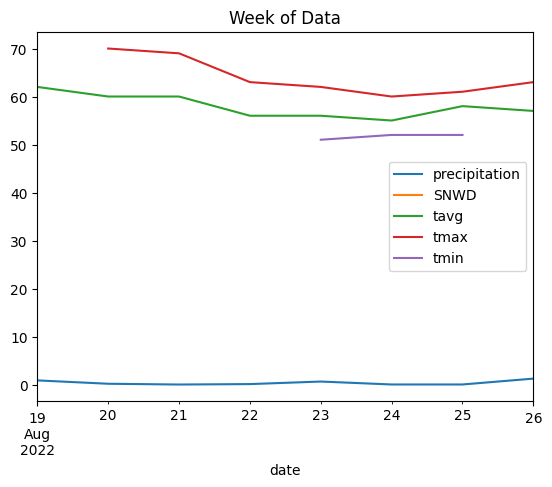

In [9]:
noaaData.loc[(noaaData.index > '2022-08-18') & (noaaData.index < '2022-08-27')].plot(title='Week of Data')

Feature Creation

In [10]:
noaaData.index.min


<bound method Index.min of DatetimeIndex(['1994-08-02', '1994-08-03', '1994-08-04', '1994-08-05',
               '1994-08-06', '1994-08-07', '1994-08-08', '1994-08-09',
               '1994-08-10', '1994-08-11',
               ...
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30', '2023-10-01', '2023-10-02',
               '2023-10-03', '2023-10-04'],
              dtype='datetime64[ns]', name='date', length=10605, freq=None)>

Create features

In [11]:
def create_features(df):
    '''
    Create time series features based on time series index
    '''
    df = df.copy()
    df['hour'] = noaaData.index.hour
    df['dayofweek'] = noaaData.index.dayofweek
    df['quarter'] = noaaData.index.quarter
    df['month'] = noaaData.index.month
    df['year'] = noaaData.index.year
    df['dayofyear'] = noaaData.index.dayofyear
    return df

df = create_features(noaaData)

Visualize our feature / Target Relationship

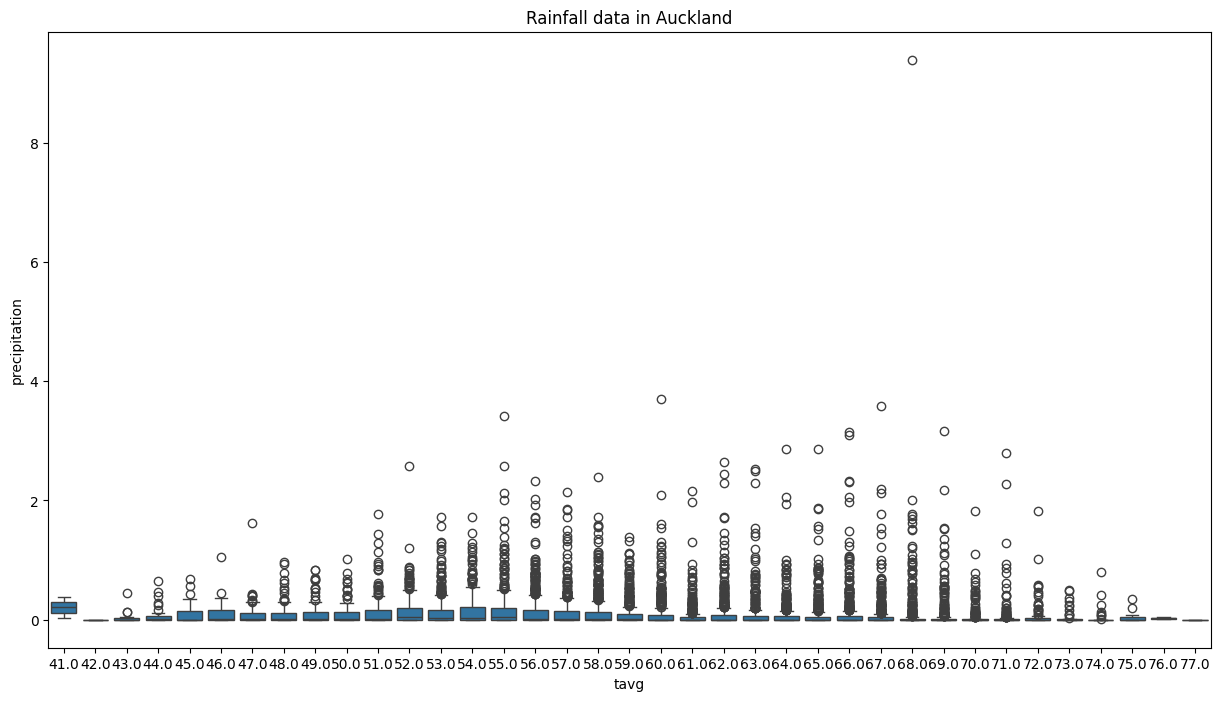

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=noaaData, x='tavg', y='precipitation')
ax.set_title('Rainfall data in Auckland')
plt.show()

Create our model

In [13]:
train = create_features(noaaData)
test = create_features(noaaData)

In [14]:
df.columns

Index(['STATION', 'NAME', 'precipitation', 'SNWD', 'tavg', 'tmax', 'tmin',
       'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear'],
      dtype='object')

In [15]:
FEATURES = ['tavg', 'tmax', 'tmin']
TARGET = 'precipitation'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [16]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],  verbose=True)

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

XGBoostError: [01:49:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\data\data.cc:507: Check failed: valid: Label contains NaN, infinity or a value too large.